# Import libraries and Dataset

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

from mlxtend.plotting import plot_decision_regions

df = pd.read_csv("iris_dataset.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Filtering Dataset

In [197]:
q1 = df[["sepal_length", "petal_length", "species"]]

q1 = q1.drop(q1[q1.species == "setosa"].index)

In [198]:
X = q1[["sepal_length", "petal_length"]]

y = q1['species']
# versicolor = -1, virginica = 1
y = np.where(y == 'versicolor', -1, 1)

#  Making Model

In [199]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

clf = Perceptron()

clf.fit(X, y)

Perceptron()

In [200]:
y_pred = clf.predict(X)

##accuracy score
accuracy_score(y, y_pred)

0.8

In [201]:
clf.coef_

array([[-56.5,  74.9]])

In [202]:
clf.intercept_

array([-38.])

In [203]:
x_array = X.to_numpy()

Text(0, 0.5, 'petal length')

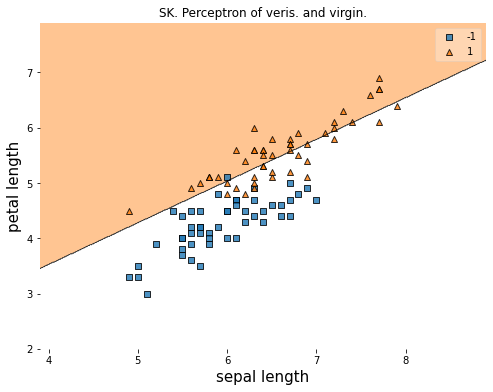

In [204]:
plt.figure(figsize = (8, 6))
plot_decision_regions(x_array, y, clf = clf)
plt.title("SK. Perceptron of veris. and virgin.")
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("petal length", fontsize = 15)

#please note that versicolor = -1, virginica = 1

# Perceptron Code for 3 attributes


In [205]:
class get_perceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        self.w3 = np.random.rand(1)
        self.b = np.random.rand(1)
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (self.predict(xi) - yi)
                self.w1 = self.w1 - update*xi[0]
                self.w2 = self.w2 - update*xi[1]
                self.w3 = self.w3 - update*xi[2]
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def weighted_sum(self, x):
        self.w = np.array([self.w1, self.w2, self.w3])
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)
    
    def accuracy(self, y_true, y_pred):
        accuracy = 0
        num_elem = 0
        if len(y_true) != len(y_pred):
            return
        for x in range(len(y_true)):
            if y_true[x] == y_pred[x]:
                accuracy += 1
                num_elem += 1
            else:
                num_elem += 1
        return accuracy/num_elem

# Formating New Dataset For 3 Attributes

In [206]:
q2 = df
q2 = q2.drop(q2[q2.species == "virginica"].index)

q2 = q2.drop(columns = ['petal_length'])
## attributes are sepal length, width and petal width


In [207]:
X = q2.iloc[:, : len(q2.columns)-1].to_numpy()

#versicolor is -1 and setosa is 1
y = q2['species']
y = np.where(y == 'versicolor', -1, 1)

In [208]:
new_clf = get_perceptron()
new_clf.fit(X, y)

y_pred = new_clf.predict(X).reshape(100)


In [209]:
print(new_clf.accuracy(y, y_pred))

1.0


# Error Plot and 3D model for points

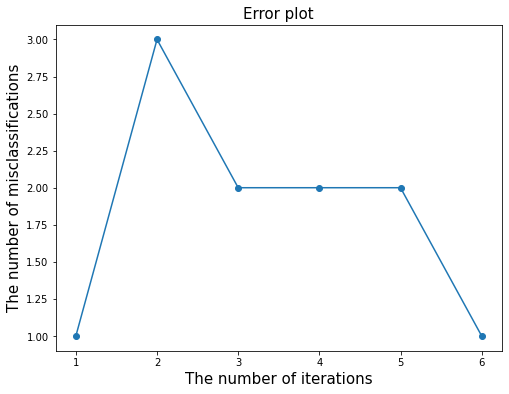

In [210]:
plt.figure(figsize = (8, 6))
plt.plot(range(1, len(new_clf.errors)+1), new_clf.errors, 
         marker = "o")
plt.title("Error plot", fontsize = 15)
plt.xlabel("The number of iterations", fontsize = 15)
plt.ylabel("The number of misclassifications", fontsize = 15)
plt.xticks(range(1, len(new_clf.errors)+1))
plt.show()

Text(0.5, 0, 'petal width')

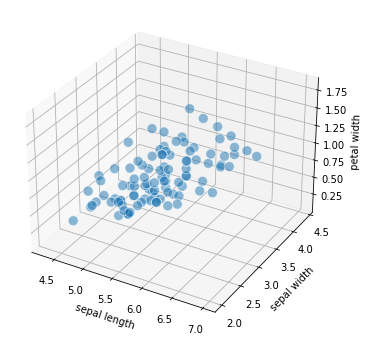

In [211]:
xs = q2.iloc[:,0]
ys = q2.iloc[:, 1]
zs = q2.iloc[:, 2]

test = plt.figure(figsize = (8, 6))

#s == size

test2 = test.add_subplot(111, projection = '3d')
test2.scatter(xs, ys, zs, s = 100, alpha = 0.5, edgecolors = 'w')

test2.set_xlabel('sepal length')
test2.set_ylabel('sepal width')
test2.set_zlabel('petal width')


# Using another set of 3 attributes

In [212]:
q2_b = df
q2_b = q2_b.drop(q2_b[q2_b.species == "virginica"].index)

q2_b = q2_b.drop(columns = ['sepal_length'])
## attributes are sepal length, width and petal width


In [213]:
X_b = q2_b.iloc[:, : len(q2_b.columns)-1].to_numpy()
print(len(X_b))
#versicolor is -1 and setosa is 1
y_b = q2_b['species']
y_b = np.where(y_b == 'versicolor', -1, 1)

100


In [214]:
new_clf_b = get_perceptron()
new_clf_b.fit(X_b, y_b)

y_pred_b = new_clf_b.predict(X_b).reshape(100)
print(new_clf_b.accuracy(y_b, y_pred_b))

1.0


# Generalizing Perceptron Code

In [215]:
class gen_perceptron(object):
    def __init__(self, eta = 0.5, epochs = 50, random_state = None):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state
        self.rand_num_gen = np.random.default_rng(self.random_state)
        
    def fit(self, X, y):
        num_attributes = X.shape[1]
        self.w_array = np.random.rand(num_attributes)
        self.b = np.random.rand(1)
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (self.predict(xi) - yi)
                self.w_array -= update * xi
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def weighted_sum(self, x):
        #maybe just make self.w == to the w array created earlier
        return np.dot(x, self.w_array) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)
    
    def accuracy(self, y_true, y_pred):
        accuracy = 0
        num_elem = 0
        if len(y_true) != len(y_pred):
            return
        for x in range(len(y_true)):
            if y_true[x] == y_pred[x]:
                accuracy += 1
                num_elem += 1
            else:
                num_elem += 1
        return accuracy/num_elem

In [216]:
##Formatting the Dataset
generalized_x = df.iloc[:, :df.shape[1]-1].to_numpy()
generalized_y = np.where((df.iloc[:,-1]) == 'virginica', -1, 1)

In [217]:
##Just testing the perceptron function
generlized_clf = gen_perceptron()
generlized_clf.fit(generalized_x, generalized_y)

gen_pred_y = generlized_clf.predict(generalized_x)

generlized_clf.accuracy(generalized_y, gen_pred_y)

0.8666666666666667

# Automating the formating of the dataset

In [218]:
class gen(object):
    def __init__(self, num_attributes = None):
        self.clf = gen_perceptron()
        self.classification = None
        self.my_score = None
        self.sklearn_score = None
        self.num_attributes = None
        
    def set_class(self, classification):
        self.classification = classification
        
    def seperate_data(self, dataset):
        if(2 >= dataset.shape[1]):
            print("Dataset does not have that many attributes")
            return None, None
        
        else:
            self.num_attributes = dataset.shape[1]-1
            X = dataset.iloc[:, :self.num_attributes].to_numpy()
            y = np.where((dataset.iloc[:,-1]) == self.classification, -1, 1)
            return X, y
    
    def run_gen_clf(self, dataset):
        X, y = self.seperate_data(dataset)
        self.clf.fit(X, y)
        y_pred = self.clf.predict(X).reshape(y.shape[0])
        self.my_score = self.clf.accuracy(y, y_pred)
        
        
    def run_perc_clf(self, dataset):
        X, y = self.seperate_data(dataset)
        clf = Perceptron()
        clf.fit(X, y)
        y_pred = clf.predict(X)
        
        self.sklearn_score = clf.score(X, y)
        
    def comp_score(self):
        if(self.my_score == None or self.sklearn_score == None):
            print('Both scores do not exist')
        else:
            print("sklearn accuracy score: " + str(self.sklearn_score))
            print("my accuracy score: " + str(self.my_score))
        
    def print_class(self):
        return self.classification
    
    def print_num(self):
        return self.num_attributes
        
    

# Testing the ML against sklearns

In [219]:
df_non_setosa = df.drop(df[df.species == "setosa"].index)

df_non_versicolor = df.drop(df[df.species == "versicolor"].index)

df_non_virginica = df.drop(df[df.species == "virginica"].index)

print(df_non_virginica)

    sepal_length  sepal_width  petal_length  petal_width     species
0            5.1          3.5           1.4          0.2      setosa
1            4.9          3.0           1.4          0.2      setosa
2            4.7          3.2           1.3          0.2      setosa
3            4.6          3.1           1.5          0.2      setosa
4            5.0          3.6           1.4          0.2      setosa
..           ...          ...           ...          ...         ...
95           5.7          3.0           4.2          1.2  versicolor
96           5.7          2.9           4.2          1.3  versicolor
97           6.2          2.9           4.3          1.3  versicolor
98           5.1          2.5           3.0          1.1  versicolor
99           5.7          2.8           4.1          1.3  versicolor

[100 rows x 5 columns]


# Testing dataset without setosa

In [220]:
gen_clf = gen()
#X, y = gen_clf.seperate_data(df, classification, 6)
classification = 'versicolor'

gen_clf.set_class(classification)

gen_clf.run_gen_clf(df_non_setosa)
gen_clf.run_perc_clf(df_non_setosa)

gen_clf.comp_score()

sklearn accuracy score: 0.74
my accuracy score: 0.7


# Testing without virginica

In [221]:
gen_clf = gen()
#X, y = gen_clf.seperate_data(df, classification, 6)
classification = 'setosa'

gen_clf.set_class(classification)

gen_clf.run_gen_clf(df_non_virginica)
gen_clf.run_perc_clf(df_non_virginica)

gen_clf.comp_score()
x = gen_clf.print_class()
print(x)

sklearn accuracy score: 1.0
my accuracy score: 1.0
setosa


# Testing without Versicolor

In [222]:
gen_clf = gen()
#X, y = gen_clf.seperate_data(df, classification, 6)
classification = 'setosa'

gen_clf.set_class(classification)

gen_clf.run_gen_clf(df_non_versicolor)
gen_clf.run_perc_clf(df_non_versicolor)

gen_clf.comp_score()


sklearn accuracy score: 1.0
my accuracy score: 1.0



#  Testing all classes against one class

In [223]:
gen_clf = gen()
#X, y = gen_clf.seperate_data(df, classification, 6)
classification = 'setosa'

gen_clf.set_class(classification)

gen_clf.run_gen_clf(df)
gen_clf.run_perc_clf(df)

gen_clf.comp_score()
print(classification)

sklearn accuracy score: 1.0
my accuracy score: 1.0
setosa


In [224]:
gen_clf = gen()
#X, y = gen_clf.seperate_data(df, classification, 6)
classification = 'versicolor'

gen_clf.set_class(classification)

gen_clf.run_gen_clf(df)
gen_clf.run_perc_clf(df)

gen_clf.comp_score()
print(classification)

sklearn accuracy score: 0.6533333333333333
my accuracy score: 0.6666666666666666
versicolor


In [230]:
gen_clf = gen()
#X, y = gen_clf.seperate_data(df, classification, 6)
classification = 'virginica'

gen_clf.set_class(classification)

gen_clf.run_gen_clf(df)
gen_clf.run_perc_clf(df)

gen_clf.comp_score()
print(classification)

sklearn accuracy score: 0.98
my accuracy score: 0.8733333333333333
virginica


# Testing With Different Attributes Sizes

In [231]:
dataset_3_attr = df[['petal_length', 'sepal_width', 'species']]
dataset_3_attr = dataset_3_attr.drop(dataset_3_attr[dataset_3_attr.species == "setosa"].index)

gen_3_clf = gen()
classification_3 = 'virginica'
gen_3_clf.set_class(classification_3)
gen_3_clf.run_gen_clf(dataset_3_attr)
gen_3_clf.run_perc_clf(dataset_3_attr)
gen_3_clf.comp_score()


sklearn accuracy score: 0.68
my accuracy score: 0.51


In [232]:
dataset_3_attr = df[['petal_length', 'sepal_width', 'species']]
dataset_3_attr = dataset_3_attr.drop(dataset_3_attr[dataset_3_attr.species == "versicolor"].index)

gen_3_clf = gen()
classification_3 = 'virginica'
gen_3_clf.set_class(classification_3)
gen_3_clf.run_gen_clf(dataset_3_attr)
gen_3_clf.run_perc_clf(dataset_3_attr)
gen_3_clf.comp_score()


sklearn accuracy score: 1.0
my accuracy score: 1.0


In [233]:
dataset_3_attr = df[['petal_length', 'sepal_width', 'sepal_length','species']]
dataset_3_attr = dataset_3_attr.drop(dataset_3_attr[dataset_3_attr.species == "setosa"].index)

gen_3_clf = gen()
classification_3 = 'virginica'
gen_3_clf.set_class(classification_3)
gen_3_clf.run_gen_clf(dataset_3_attr)
gen_3_clf.run_perc_clf(dataset_3_attr)
gen_3_clf.comp_score()


sklearn accuracy score: 0.92
my accuracy score: 0.66


In [234]:
dataset_3_attr = df[['petal_length', 'sepal_width', 'sepal_length','species']]
dataset_3_attr = dataset_3_attr.drop(dataset_3_attr[dataset_3_attr.species == "versicolor"].index)

gen_3_clf = gen()
classification_3 = 'virginica'
gen_3_clf.set_class(classification_3)
gen_3_clf.run_gen_clf(dataset_3_attr)
gen_3_clf.run_perc_clf(dataset_3_attr)
gen_3_clf.comp_score()


sklearn accuracy score: 1.0
my accuracy score: 1.0
